In [48]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

In [49]:
lm = LogisticRegression()
df = pd.read_csv('billionaires.csv')

In [50]:
df.head()

,age,category,citizenship,company.name,company.type,country code,founded,from emerging,gdp,gender,...,name,rank,region,relationship,sector,was founder,was political,wealth.type,worth in billions,year
0,-1,Financial,Saudi Arabia,Rolaco Trading and Contracting Company,new,SAU,1968,True,1.580000e+11,male,...,Abdul Aziz Al-Sulaiman,404,Middle East/North Africa,founder,construction,True,False,self-made finance,1.0,1996
1,34,Financial,United States,Fidelity Investments,new,USA,1946,True,8.100000e+12,female,...,Abigail Johnson,145,North America,relation,investment banking,True,False,inherited,2.5,1996
2,59,Non-Traded Sectors,Brazil,Companhia Brasileira de Distribui?ao,new,BRA,1948,True,8.540000e+11,male,...,Abilio dos Santos Diniz,322,Latin America,relation,retail,True,False,inherited,1.2,1996
3,61,New Sectors,Germany,Ratiopharm,new,DEU,1881,True,2.500000e+12,male,...,Adolf Merckle,388,Europe,relation,pharmaceuticals,True,False,inherited,1.0,1996
4,-1,Financial,Hong Kong,Swire,new,HKG,1816,True,1.600000e+11,male,...,Adrian and John Swire,162,East Asia,relation,trading company,True,False,inherited,2.2,1996


In [32]:
print df['was political'].unique()
print df['wealth.type'].unique()


[False  True]
['self-made finance' 'inherited' 'founder non-finance' 'executive'
 'privatized and resources' nan]


In [5]:
df.describe()

,age,founded,gdp,rank,worth in billions,year
count,2614.000000,2614.000000,2.614000e+03,2614.000000,2614.000000,2614.000000
mean,53.212701,1924.711936,1.769103e+12,599.672533,3.531943,2008.411630
std,25.591642,243.776546,3.547083e+12,467.885695,5.088813,7.483598
min,-1.000000,0.000000,0.000000e+00,1.000000,1.000000,1996.000000
25%,47.000000,1936.000000,0.000000e+00,215.000000,1.400000,2001.000000
50%,59.000000,1963.000000,0.000000e+00,430.000000,2.000000,2014.000000
75%,70.000000,1985.000000,7.250000e+11,988.000000,3.500000,2014.000000
max,98.000000,2012.000000,1.060000e+13,1565.000000,76.000000,2014.000000


In [6]:
political = df[df['was political']==True]

political.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 5 to 2610
Data columns (total 22 columns):
age                  78 non-null int64
category             78 non-null object
citizenship          78 non-null object
company.name         77 non-null object
company.type         76 non-null object
country code         78 non-null object
founded              78 non-null int64
from emerging        78 non-null bool
gdp                  78 non-null float64
gender               78 non-null object
industry             78 non-null object
inherited            78 non-null bool
name                 78 non-null object
rank                 78 non-null int64
region               78 non-null object
relationship         78 non-null object
sector               77 non-null object
was founder          78 non-null bool
was political        78 non-null bool
wealth.type          78 non-null object
worth in billions    78 non-null float64
year                 78 non-null int64
dtypes: bool(4), float64(

In [7]:
not_political = df[df['was political'] == False]

not_political.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2536 entries, 0 to 2613
Data columns (total 22 columns):
age                  2536 non-null int64
category             2535 non-null object
citizenship          2536 non-null object
company.name         2499 non-null object
company.type         2502 non-null object
country code         2536 non-null object
founded              2536 non-null int64
from emerging        2536 non-null bool
gdp                  2536 non-null float64
gender               2502 non-null object
industry             2535 non-null object
inherited            2536 non-null bool
name                 2536 non-null object
rank                 2536 non-null int64
region               2536 non-null object
relationship         2490 non-null object
sector               2514 non-null object
was founder          2536 non-null bool
was political        2536 non-null bool
wealth.type          2514 non-null object
worth in billions    2536 non-null float64
year                

3.12051282051
4.99743589744


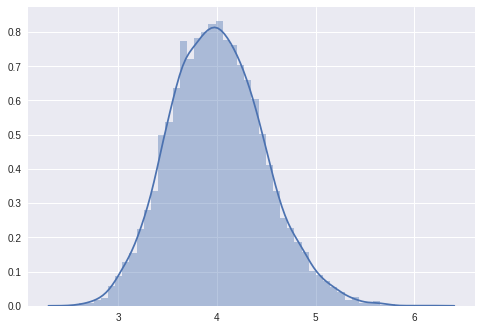

In [8]:
political_sample = political['worth in billions']

bootstrap_political_samples = [np.mean(np.random.choice(political_sample, size=78, replace=True)) for i in range(9999)]

sns.distplot(bootstrap_political_samples)
print np.percentile(bootstrap_political_samples, 2.5)
print np.percentile(bootstrap_political_samples, 97.5)

2.60256410256
4.83602564103


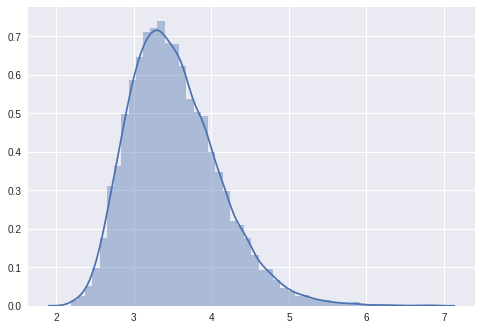

In [9]:
not_political_sample = not_political['worth in billions']

bootstrap_not_political_samples = [np.mean(np.random.choice(not_political_sample, size=78, replace=True)) for i in range(9999)]

sns.distplot(bootstrap_not_political_samples)
print np.percentile(bootstrap_not_political_samples, 2.5)
print np.percentile(bootstrap_not_political_samples, 97.5)

In [10]:
bootstrap_samples_ab = [np.mean(np.random.choice(political_sample, size=53, replace=True)) - np.mean(np.random.choice(not_political_sample, size=53, replace=True)) for i in range(9999)]

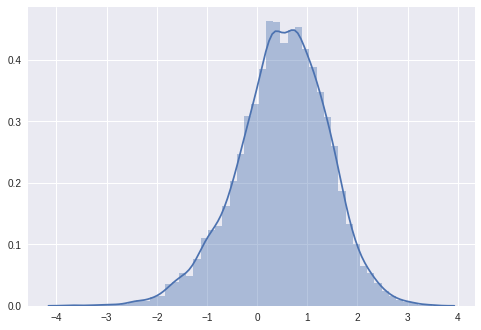

In [11]:
sns.distplot(bootstrap_samples_ab)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
age                  2614 non-null int64
category             2613 non-null object
citizenship          2614 non-null object
company.name         2576 non-null object
company.type         2578 non-null object
country code         2614 non-null object
founded              2614 non-null int64
from emerging        2614 non-null bool
gdp                  2614 non-null float64
gender               2580 non-null object
industry             2613 non-null object
inherited            2614 non-null bool
name                 2614 non-null object
rank                 2614 non-null int64
region               2614 non-null object
relationship         2568 non-null object
sector               2591 non-null object
was founder          2614 non-null bool
was political        2614 non-null bool
wealth.type          2592 non-null object
worth in billions    2614 non-null float64
year                

In [37]:
df = df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2539 entries, 0 to 2613
Data columns (total 22 columns):
age                  2539 non-null int64
category             2539 non-null object
citizenship          2539 non-null object
company.name         2539 non-null object
company.type         2539 non-null object
country code         2539 non-null object
founded              2539 non-null int64
from emerging        2539 non-null bool
gdp                  2539 non-null float64
gender               2539 non-null object
industry             2539 non-null object
inherited            2539 non-null bool
name                 2539 non-null object
rank                 2539 non-null int64
region               2539 non-null object
relationship         2539 non-null object
sector               2539 non-null object
was founder          2539 non-null bool
was political        2539 non-null bool
wealth.type          2539 non-null object
worth in billions    2539 non-null float64
year                

In [69]:
df = df.join(pd.get_dummies(df['wealth.type'], prefix = 'wealth_type'))

In [52]:
df['was political'] = df['was political'].astype(int)

In [70]:
df.head()

,age,category,citizenship,company.name,company.type,country code,founded,from emerging,gdp,gender,...,was founder,was political,wealth.type,worth in billions,year,wealth_type_executive,wealth_type_founder non-finance,wealth_type_inherited,wealth_type_privatized and resources,wealth_type_self-made finance
0,-1,Financial,Saudi Arabia,Rolaco Trading and Contracting Company,new,SAU,1968,True,1.580000e+11,male,...,True,0,self-made finance,1.0,1996,0,0,0,0,1
1,34,Financial,United States,Fidelity Investments,new,USA,1946,True,8.100000e+12,female,...,True,0,inherited,2.5,1996,0,0,1,0,0
2,59,Non-Traded Sectors,Brazil,Companhia Brasileira de Distribui?ao,new,BRA,1948,True,8.540000e+11,male,...,True,0,inherited,1.2,1996,0,0,1,0,0
3,61,New Sectors,Germany,Ratiopharm,new,DEU,1881,True,2.500000e+12,male,...,True,0,inherited,1.0,1996,0,0,1,0,0
4,-1,Financial,Hong Kong,Swire,new,HKG,1816,True,1.600000e+11,male,...,True,0,inherited,2.2,1996,0,0,1,0,0


In [76]:
lm.fit(df[['worth in billions', 'wealth_type_inherited', 'wealth_type_privatized and resources', 
          'wealth_type_executive', 'wealth_type_founder non-finance', 
          'wealth_type_self-made finance']], df['was political'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
# coef of "worth in billions"
print lm.coef_

[[ 0.00472248 -0.87829518  2.71918934 -1.29534596 -2.13008053 -1.57838504]]


In [79]:
#y intercept of 
print lm.intercept_

[-3.69841996]


In [80]:
# mean of political billionaires
print df['was political'].mean()

0.0298393267024


In [82]:
# odds 0.02:1
np.exp(lm.intercept_)

array([ 0.02476262])

In [83]:
# probability in percent
np.exp(lm.intercept_)/(1 + np.exp(lm.intercept_))

array([ 0.02416425])

In [84]:
# For every billion increase, you increase your odd of it being political
np.exp(lm.coef_)

array([[  1.00473365,   0.41549065,  15.16802113,   0.27380312,
          0.11882772,   0.20630801]])

In [92]:
#if you have 76 billion, you have a 3% chance of it being political
odds = np.exp(lm.intercept_) * (1.00473365 ** 76)
odds/(1 + odds)

array([ 0.03424031])

In [94]:
#if your wealth type is 'privatized and resources', you have a 27% chance of it being political
odds = np.exp(lm.intercept_) * (15.16802113 ** 1)
odds/(1 + odds)

array([ 0.27304447])

In [89]:
df.describe()

,age,founded,gdp,rank,was political,worth in billions,year,wealth_type_executive,wealth_type_founder non-finance,wealth_type_inherited,wealth_type_privatized and resources,wealth_type_self-made finance
count,2614.000000,2614.000000,2.614000e+03,2614.000000,2614.000000,2614.000000,2614.000000,2614.000000,2614.000000,2614.000000,2614.000000,2614.000000
mean,53.212701,1924.711936,1.769103e+12,599.672533,0.029839,3.531943,2008.411630,0.072686,0.272762,0.364575,0.090283,0.191278
std,25.591642,243.776546,3.547083e+12,467.885695,0.170176,5.088813,7.483598,0.259669,0.445465,0.481403,0.286642,0.393382
min,-1.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1996.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1936.000000,0.000000e+00,215.000000,0.000000,1.400000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,1963.000000,0.000000e+00,430.000000,0.000000,2.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,1985.000000,7.250000e+11,988.000000,0.000000,3.500000,2014.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,98.000000,2012.000000,1.060000e+13,1565.000000,1.000000,76.000000,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000
